In [10]:
from common import *
disable_fig_save = False 
save_loc = 'plots'
save_prefix="pathfinding"
config_common(disable_fig_save=disable_fig_save, save_loc=save_loc, save_prefix=save_prefix)
from colors import *

In [11]:
import matplotlib.pyplot as plt
import numpy as np
import os
import pandas as pd
import re
import warnings

%config InlineBackend.figure_format = 'svg'

from os import path
from typing import Dict, List, Set

import matplotlib.ticker as mtick
import matplotlib as mpl
from scipy.stats.mstats import gmean
from matplotlib.ticker import (MultipleLocator, FormatStrFormatter,
                               AutoMinorLocator, ScalarFormatter, LogLocator)
import matplotlib.patches as patches
import matplotlib.patches as mpatches
from matplotlib import rc

import seaborn as sns

In [12]:
init_notebook()
figsize = (7,1.65)
fontsize = 11

In [13]:
dataf = "../../data/clwbsfencedist.csv"

In [14]:
!sha256sum $dataf

03275d6bc7b9a2889933955d44a382e44ff8372affc6b12671afeef06cb1632b  ../../data/clwbsfencedist.csv


In [15]:
df = pd.read_csv(dataf, index_col=None, names=['Distance', '1. CLWB + delayed drain', '2. Delayed CLWB + drain', '3. NT-Store + delayed drain'])
df.index = df['Distance']
del df['Distance']

In [16]:
df.T

Distance,0,10,20,30,40,50,60,70,80,90,100,110,120,130,140,150,160,170,180,190,200,210,220,230,240,250,260,270,280,290,300,310,320,330,340,350,360,370,380,390
1. CLWB + delayed drain,1398.70,1388.17,1367.45,1345.09,1326.50,1309.78,1292.05,1279.85,1273.34,1268.40,1262.49,1256.97,1258.13,1257.04,1258.31,1256.13,1256.73,1256.80,1259.07,1256.74,1256.46,1253.68,1260.37,1259.12,1259.64,1259.08,1259.58,1260.53,1258.50,1257.66,1259.93,1257.89,1259.54,1260.19,1257.77,1257.38,1258.28,1257.17,1256.06,1260.20
2. Delayed CLWB + drain,1404.52,1395.08,1371.97,1353.47,1335.76,1315.80,1303.90,1301.68,1301.03,1302.49,1298.82,1300.88,1299.28,1307.78,1305.51,1303.58,1296.73,1299.12,1302.51,1299.68,1300.83,1299.66,1304.12,1308.77,1304.87,1298.57,1302.02,1304.36,1315.27,1297.29,1292.25,1293.89,1290.38,1290.97,1294.45,1291.04,1290.66,1293.12,1290.08,1289.92
3. NT-Store + delayed drain,1275.47,1258.60,1240.72,1219.72,1197.05,1182.06,1183.22,1181.49,1178.54,1214.83,1183.94,1189.18,1213.63,1184.43,1180.16,1180.66,1187.23,1181.97,1181.30,1181.50,1179.86,1181.43,1176.25,1178.48,1196.25,1187.52,1183.76,1189.18,1178.94,1185.76,1203.10,1202.43,1180.60,1181.50,1177.14,1176.80,1179.58,1180.55,1175.96,1180.30


In [17]:
Fig.config(12, (8, 2))

Plot saved as `plots/pathfinding/clwbsfencedist.png`

Plot saved as `plots/pathfinding/clwbsfencedist.png`

Using pdfcrop on `plots/pathfinding/clwbsfencedist.png` with command `pdfcrop plots/pathfinding/clwbsfencedist.pdf plots/pathfinding/clwbsfencedist.pdf`

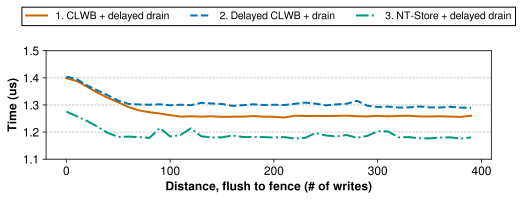

In [18]:
plt.rcParams["font.family"] = "freesans"
ax = (df/1000).plot(**Fig.get_kwargs(bar=False, legend=None, linewidth=2, markersize=5, markevery=2))
f = Fig(ax)
linestyle=['-', '--', '-.']
marker=['s', '^']
color=[CBcdict['Ve'], CBcdict['Bu'], CBcdict['bG']]
for i, line in enumerate(ax.get_lines()):
    line.set_linestyle(linestyle[i])
    line.set_color(color[i])

f.fmt_legend(fontsize=fontsize-0.5)
f.fmt_label('Distance, flush to fence (# of writes)', 'Time (us)')
f.fmt_grid(axis='y', linestyle='--', linewidth=0.7)
ax.set_yticks(np.arange(1.1, 1.51, 0.1))
save_fig('clwbsfencedist')